# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [16]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,sex_label,embarked_C,embarked_Q,embarked_S,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,1,False,False,True,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,0,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,0,False,False,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,0,False,False,True,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,1,False,False,True,False,False,True


In [12]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [13]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex']) # Reemplaza la categoria por un numero entero 0 y 1

In [14]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [15]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [37]:
print("LabelEncoder transforma a numeros enteros los datos, para ser interpretados, todo en la misma columna, mientras que OneHotEncoder crea mas columnas, en donde los resultados que coincidan con el header quedaran como 1 en la fila correspondiente, y los demas en 0.")

# data['sex_label']
combined = pd.concat([onehot_encoder, data['sex_label']], axis=1)
combined.head()

LabelEncoder transforma a numeros enteros los datos, para ser interpretados, todo en la misma columna, mientras que OneHotEncoder crea mas columnas, en donde los resultados que coincidan con el header quedaran como 1 en la fila correspondiente, y los demas en 0.


,embarked_C,embarked_Q,embarked_S,sex_label
0,False,False,True,1
1,True,False,False,0
2,False,False,True,0
3,False,False,True,0
4,False,False,True,1


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

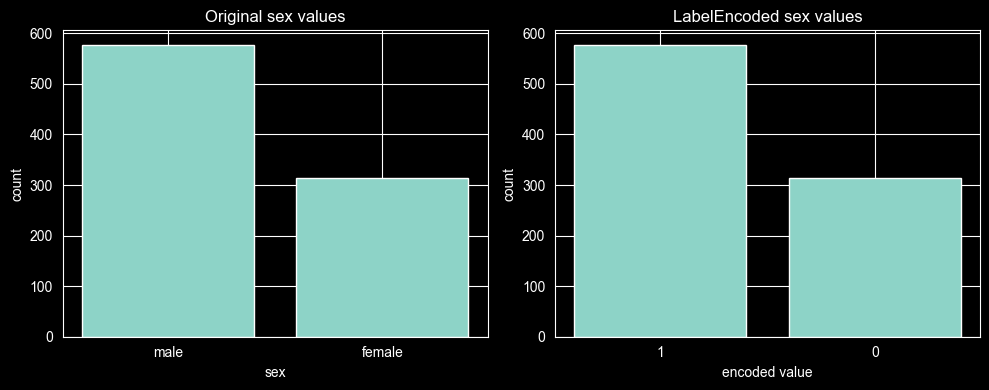

LAs frecuencias no cambian, ya que labelencoder solo reemplaza texto por numeros, no modifica el conteo de los datos


In [41]:
import matplotlib.pyplot as plt

data = sns.load_dataset("titanic")

sex_counts = data["sex"].value_counts()

le = LabelEncoder()
data["sex_label"] = le.fit_transform(data["sex"])
encoded_counts = data["sex_label"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(sex_counts.index, sex_counts.values)
axes[0].set_title("Original sex values")
axes[0].set_xlabel("sex")
axes[0].set_ylabel("count")

axes[1].bar(encoded_counts.index.astype(str), encoded_counts.values)
axes[1].set_title("LabelEncoded sex values")
axes[1].set_xlabel("encoded value")
axes[1].set_ylabel("count")
plt.tight_layout()
plt.show()

print("LAs frecuencias no cambian, ya que labelencoder solo reemplaza texto por numeros, no modifica el conteo de los datos")

### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [51]:
onehot_encoder_class = pd.get_dummies(data['class'], prefix='class')
data['class'] = label_encoder.fit_transform(data['class']) # Reemplaza la categoria por un numero entero 0 y 1
combined_class = pd.concat([onehot_encoder_class, data['class']], axis=1)
print("La ventaja de OneHotEncoder es que es mas segura ya que representa cada Class como un feature independiente, aunque es mejor para variables que no tienen orden, ya que LabelEncoder podria crear un orden falso. LabelEncoder solo deberia utilizarse cuando el feature tiene un orden real y es util para el modelo")
combined_class.head(10)

La ventaja de OneHotEncoder es que es mas segura ya que representa cada Class como un feature independiente, aunque es mejor para variables que no tienen orden, ya que LabelEncoder podria crear un orden falso. LabelEncoder solo deberia utilizarse cuando el feature tiene un orden real y es util para el modelo


,class_0,class_1,class_2,class
0,False,False,True,2
1,True,False,False,0
2,False,False,True,2
3,True,False,False,0
4,False,False,True,2
5,False,False,True,2
6,True,False,False,0
7,False,False,True,2
8,False,False,True,2
9,False,True,False,1


### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

In [55]:
print("OneHotEncoder es la mejor opcion para la mayoria de modelos, ya que no crea un orden numerico falso, ademas sigue reemplazando las variables con numeros, pero como caracteristicas independientes")
combined_class.head(10)


OneHotEncoder es la mejor opcion para la mayoria de modelos, ya que no crea un orden numerico falso, ademas sigue reemplazando las variables con numeros, pero como caracteristicas independientes


,class_0,class_1,class_2,class
0,False,False,True,2
1,True,False,False,0
2,False,False,True,2
3,True,False,False,0
4,False,False,True,2
5,False,False,True,2
6,True,False,False,0
7,False,False,True,2
8,False,False,True,2
9,False,True,False,1
